## Aufgabe: Neuronales Netz

Diese Programieraufgabe berechnet ein neuronales Netz fuer einen Beispieldatensatz. Es geht darum einen Klassifizierer zu trainieren, der Ziffern erkennen soll.

Gegeben sind folgende Ziffern zum Training:


![](numbers.jpg)

### Augabe 1:

Bilden sie die Ziffern in einem Numpy-Array X ab und und die Label in einem weiteren Numpy-Array Y:

In [9]:
import numpy as np
np.set_printoptions(suppress=True)

In [10]:
X = np.array([[0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0],  # Ziffer '1'\n",
              [0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1],  # Ziffer '2'\n",
              [0,1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,0,1,1,0]]) # Ziffer '3'\n" Ziffer '3'

Y = np.array([[1,0,0],  # klassifiziert als ‚1’
              [0,1,0],  # klassifiziert als ‚2’
              [0,0,1]]) # klassifiziert als ‚3’

**Test, ob die Arrays auch wirklich richtig eingegeben wurden**

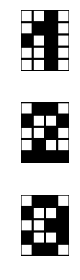

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Q = np.reshape(X, (3,5,4))

cmap = plt.cm.Greys

fig, ax = plt.subplots(Q.shape[0])

for i in range(ax.shape[0]):
    ax[i].set_aspect('equal')
    ax[i].set_axis_off()
    ax[i].pcolor(np.flipud(Q[i]), edgecolors='k', linewidths=2, cmap=cmap)

fig.tight_layout()
plt.show()


## Aufgabe 2:


Schreiben Sie die Hilfsfunktionen zur Berechnung des sigmoid und der Funktion eines Neuron (incl. Aktivierung durch sigmoids):

In [13]:
# Sigmoid Berechnung
def sigmoid(x):
    # your code goes here
    return 1/(1+np.exp(-x))

# Ableitung vom sigmoid
def sigmoid_d(x):
    return sigmoid(x)*(1-sigmoid(x))

# Neuron 
def neuron(I,W,f):
    # your code goes here
    return f(np.dot(I,W))

# Layer 
def layer(I,W):
    # your code goes here
    return neuron(I,W,sigmoid)

# Test
print(neuron(np.array([1,2,3]), np.array([1,1,1]), sigmoid))

# das Resultat sollte 0.9975273768433653 sein!!!!


0.9975273768433653


### Aufgabe 3:

Initialisiere das neuronale Netz und verknuepfe die Layer. Das Netz sollte einen Input-Layer (L0), 1 Hidden-Layer (L1) und einen Output-Layer (L3) haben.



In [14]:
# Initialisierung
np.random.seed(1)       

# Verknuepfe Input- mit Hidden-Layer

# wieviele  Eingangswerte gibt es?
# und waehle beliebig Neuronen im Hidden-Layer
W0 = np.random.random((20,30)) 

# Verknuepfe Hidden- mit Output-Layer

# wieviele  Ausgangswerte gibt es?

W1 = np.random.random((30,3))


L0 = X              # Input Layer
L1 = layer(L0, W0)  # Hidden Layer
L3 = layer(L1, W1)  # Output Layer
print(L3)

# Das sollte laufen und folgendes ausgeben
#[[0.99999987 0.99999897 0.99999929]
# [0.99999992 0.99999932 0.9999995 ]
# [0.99999992 0.99999931 0.9999995 ]]


[[0.99999987 0.99999897 0.99999929]
 [0.99999992 0.99999932 0.9999995 ]
 [0.99999992 0.99999931 0.9999995 ]]


## Aufgabe 4:

Das eigentliche Herzstueck. Implementiere den Backpropagation-Algorithmus ueber dieses neuronale Netz. Hierzu:
1. Berechne das Resultat, sprich fuehre Forward-Propagation aus
2. Ermittle den Fehler zwischen dem Resultat und Y
3. Bestimme das Delta mit dem die Wichtungen zwischen Hidden und Output-Layer angepasst werden muss
4. Bestimme das Delta mit dem die Wichtungen zwischen Hidden und Input-Layer anpasst werden muss
5. Wiederhole das Ganze, bis der Fehler kleiner 0.05 ist!

0 Error: 0.6666664684
1 Error: 0.6532297798
2 Error: 0.3335503084
3 Error: 0.4857498090
4 Error: 0.3684471186
5 Error: 0.6226404010
6 Error: 0.3334557970
7 Error: 0.4484668228
8 Error: 0.4027772739
9 Error: 0.5400987772
10 Error: 0.3447847136
11 Error: 0.5710967506
12 Error: 0.3582730959
13 Error: 0.4691820316
14 Error: 0.4098541233
15 Error: 0.4590375682
16 Error: 0.4429856326
17 Error: 0.5147953030
18 Error: 0.3566456630
19 Error: 0.4735943397
20 Error: 0.3602927298
21 Error: 0.5524502545
22 Error: 0.3335885476
23 Error: 0.5313577609
24 Error: 0.3620581886
25 Error: 0.4276051789
26 Error: 0.3539517666
27 Error: 0.5168308066
28 Error: 0.4263797779
29 Error: 0.3881121379
30 Error: 0.3420964238
31 Error: 0.4377456062
32 Error: 0.3048748720
33 Error: 0.4488094186
34 Error: 0.3306011919
35 Error: 0.5153013873
36 Error: 0.3330783323
37 Error: 0.3727043320
38 Error: 0.2961838752
39 Error: 0.4968660455
40 Error: 0.3309216504
41 Error: 0.3720174572
42 Error: 0.3233973557
43 Error: 0.500760012

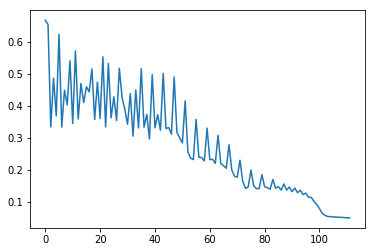

In [15]:
errA = []

for i in range(60000):
    
    L0 = X
    L1 = layer(L0, W0)
    L2 = layer(L1, W1)

    L2_err = Y - L2
    # print(tL2)
    L2_delta = L2_err * sigmoid_d(L2)
    W1 += np.dot(L1.T, L2_delta)
    
    
    err = np.mean(np.abs(L2_err))
    print("%s Error: %6.10f" % (i, err))
    errA.append(err)
        
    if np.mean(np.abs(L2_err)) < 0.05:
        break

    L1_err = np.dot(L2_delta, W1.T)    
    L1_delta = L1_err * sigmoid_d(L1)
    W0 += np.dot(L0.T, L1_delta)
    
plt.plot(errA)
plt.show()

### Aufgabe 5:
Zeit zum Testen. Wir schauen mal ob das Modell nun auch Abweichungen erkennen kann und richtig klassifieziert.
Hierzu gibt es folgende Abweichungen:

![Abweichungen](numbers_new.jpg)

Zunaechst kurz ueberlegen, wie das als Numpy-Array abgebildet werden kann!

In [16]:
# Test1
L0 = np.array([[0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0]])
L1 = layer(L0, W0)
L2 = layer(L1, W1)

print(L2)
# Ausgabe etwas wie
# [[0.95764431 0.02022213 0.00282105]]


[[0.95764431 0.02022213 0.00282105]]


Was heisst das Ergebnis?

Test 2

In [17]:
# Test 2
L0 = np.array([[0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0]])
L1 = layer(L0, W0)
L2 = layer(L1, W1)

print(L2)

# Ausgabe etwas wie
# [[0.88233092 0.05561936 0.00533852]]

[[0.88233092 0.05561936 0.00533852]]
